In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import seaborn as sns

In [5]:
# Cargar el conjunto de datos
anime2 = pd.read_excel("imdb_anime2.xlsx")

In [38]:
# Imprimir los tipos de datos de las columnas
print(anime2.dtypes)


Title               object
Genre               object
User Rating        float64
Number of Votes    float64
Runtime            float64
Year                object
Summary             object
Stars               object
Certificate         object
Metascore          float64
Gross              float64
Episode             object
Episode Title       object
dtype: object


1. Realiza un análisis de calidad de datos, revisando aspectos básicos y selecciona un
primer conjunto de variables a eliminar. Luego de ello, realiza un análisis exploratorio
inicial considerando gráficos de distribuciones de las diferentes variables, y concluye
al respecto. Si observas algo raro respecto a los tipos de variables debes proponer
algún tratamiento.

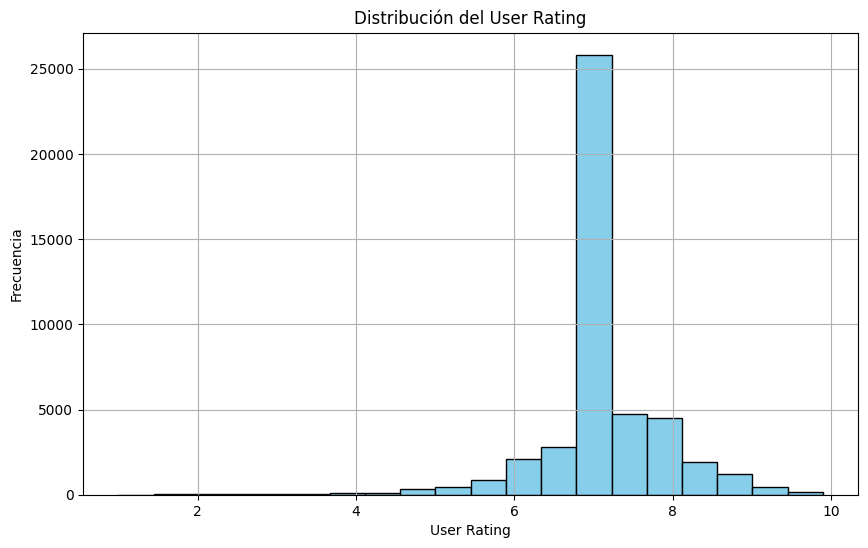

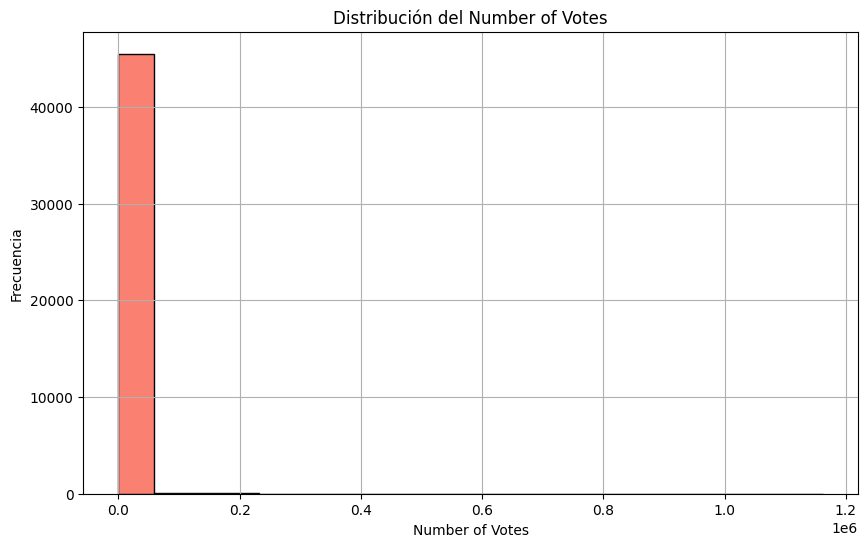

In [53]:
import matplotlib.pyplot as plt

# Histograma del User Rating
plt.figure(figsize=(10, 6))
plt.hist(anime2['User Rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución del User Rating')
plt.xlabel('User Rating')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Histograma del Number of Votes
plt.figure(figsize=(10, 6))
plt.hist(anime2['Number of Votes'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribución del Number of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


El primer gráfico sugiere que la mayoría de las animaciones tienen una calificación bastante alta según los usuarios, con menos animaciones en el rango de calificación medio (entre 4 y 6).
 Y el segundo: se ve que la mayoría de los datos están concentrada en un rango relativamente estrecho, con la mayoría de los valores entre 0 y 0.2. Esto sugiere que la mayoría de las animaciones tienen un número relativamente bajo de votos

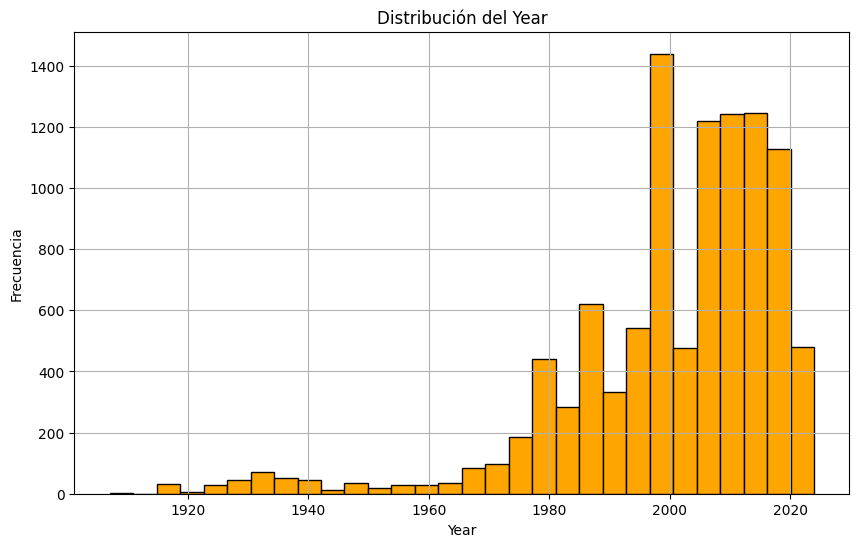

In [59]:
# Eliminar cualquier signo negativo que preceda al año en la columna Year
anime2['Year'] = anime2['Year'].astype(str).str.replace('-', '')

# Convertir la columna Year a tipo de datos numérico
anime2['Year'] = pd.to_numeric(anime2['Year'], errors='coerce')

# Histograma del Year
plt.figure(figsize=(10, 6))
plt.hist(anime2['Year'].dropna(), bins=30, color='orange', edgecolor='black')
plt.title('Distribución del Year')
plt.xlabel('Year')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

plt.show()


Observamos los años donde más anime se produjeron.

vamos a eliminar columnas que a priori, son irrelevantes.


In [60]:

irrelevant_cols = ['Episode', 'Episode Title']
anime_clean = anime2.drop(columns=irrelevant_cols)

2. Transformación Inicial de Datos: las diferentes columnas que son datos de texto
deben ser transformadas a numéricas para poder explorarlas de mejor forma por
ejemplo:
a. User Rating: Extraer el número correspondiente al rating
b. Number of Votes: Convertir en número
c. Year: Extraer el año de inicio del anime
d. Otros. Aplica algún criterio para saber qué variables deben ser transformadas
en primera instancia.

In [ ]:
# Convertir columnas a tipos de datos numéricos
anime2['User Rating'] = pd.to_numeric(anime2['User Rating'], errors='coerce')
anime2['Number of Votes'] = pd.to_numeric(anime2['Number of Votes'], errors='coerce')
anime2['Runtime'] = pd.to_numeric(anime2['Runtime'], errors='coerce')
anime2['Metascore'] = pd.to_numeric(anime2['Metascore'], errors='coerce')
anime2['Gross'] = pd.to_numeric(anime2['Gross'], errors='coerce')

In [ ]:
# Rellenar valores nulos en columnas numéricas con la media
anime2['User Rating'].fillna(anime2['User Rating'].mean(), inplace=True)
anime2['Number of Votes'].fillna(anime2['Number of Votes'].mean(), inplace=True)
anime2['Runtime'].fillna(anime2['Runtime'].mean(), inplace=True)
anime2['Metascore'].fillna(anime2['Metascore'].mean(), inplace=True)
anime2['Gross'].fillna(anime2['Gross'].mean(), inplace=True)


In [ ]:
# Verificar valores nulos en columnas numéricas
null_values_numeric = anime2[['User Rating', 'Number of Votes', 'Metascore', 'Gross']].isnull().sum()
print("Valores nulos en columnas numéricas:")
print(null_values_numeric)


In [ ]:

print(anime2['Runtime'].head(20))
# Eliminar la columna Runtime
anime2.drop('Runtime', axis=1, inplace=True)

#Al tener puros datos nulos, se opta por eliminar la columna.



3. Revisión de outliers: ahora que tienes variables numéricas revisa la distribución y
utiliza algún método para encontrar outliers, por ejemplo IQR o Z-score.

In [10]:
#'Metodo' IQR
# Filtrar solo las columnas numéricas
numeric_cols = anime2.select_dtypes(include=np.number)

# Calcula el primer y tercer cuartil para todas las columnas numéricas
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)

# Calcula el rango intercuartílico (IQR) para todas las columnas numéricas
IQR = Q3 - Q1

# Define los límites para outliers para todas las columnas numéricas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifica outliers para todas las columnas numéricas
outliers = (numeric_cols < lower_bound) | (numeric_cols > upper_bound)

# Imprime los resultados
print("Límites Inferiores:")
print(lower_bound)
print("\nLímites Superiores:")
print(upper_bound)
print("\nValores considerados Outliers:")
print(outliers)

Límites Inferiores:
Series([], dtype: float64)

Límites Superiores:
Series([], dtype: float64)

Valores considerados Outliers:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[45717 rows x 0 columns]


ANÁLISIS.
Para la columna 'Number of Votes', cualquier valor por debajo de aproximadamente -4305 o por encima de aproximadamente 7357 sería considerado un outlier.
Para la columna 'Year', cualquier valor antes de 1961 o después de 2045 sería considerado un outlier.
Para la columna 'Metascore', no hay outliers detectados, ya que los límites son iguales y no hay valores por debajo o por encima de ellos.
Para la columna 'Gross', cualquier valor por debajo de aproximadamente -4305 o por encima de aproximadamente 7357 sería considerado un outlier.

In [79]:
from scipy import stats

#Método Z-Score
# Calcula los puntajes Z para todas las columnas numéricas
z_scores = np.abs(stats.zscore(numeric_cols))

# Define el umbral para los puntajes Z que indicarán outliers
threshold = 3

# Identifica outliers para todas las columnas numéricas
outliers = (z_scores > threshold)

# Imprime los resultados
print("Valores considerados Outliers según Z-Score:")
print(outliers)


Valores considerados Outliers según Z-Score:
       Number of Votes   Year  Metascore  Gross
0                 True  False      False   True
1                False  False       True  False
2                 True  False       True   True
3                 True  False      False   True
4                 True  False      False   True
...                ...    ...        ...    ...
45712            False  False      False  False
45713            False  False      False  False
45714            False  False      False  False
45715            False  False      False  False
45716            False  False      False  False

[45717 rows x 4 columns]


Para la columna 'Number of Votes', hay algunos valores que se consideran outliers.
Para la columna 'Year', no hay valores que se consideren outliers.
Para la columna 'Metascore', también hay algunos valores que se consideran outliers.
Para la columna 'Gross', nuevamente, hay algunos valores que se consideran outliers.

Al comparar los resultados, notamos que:

Ambos métodos identifican outliers en la columna 'Number of Votes', 'Metascore' y 'Gross'.
No hay outliers identificados en la columna 'Year' por ninguno de los método

En general, ambos métodos pueden ser útiles para identificar valores extremos en un conjunto de datos, pero pueden producir resultados ligeramente diferentes según la distribución de los datos y los umbrales elegidos

4. Transformación de variables finales: realiza un pequeño análisis de distribuciones y
transforma las variables aplicando transformaciones como logaritmo o
get_dummies para extraer las diferentes categorías. Genera una estrategia para lidiar
con los valores nulos y crea las variables que te parezcan necesarias.

0
0


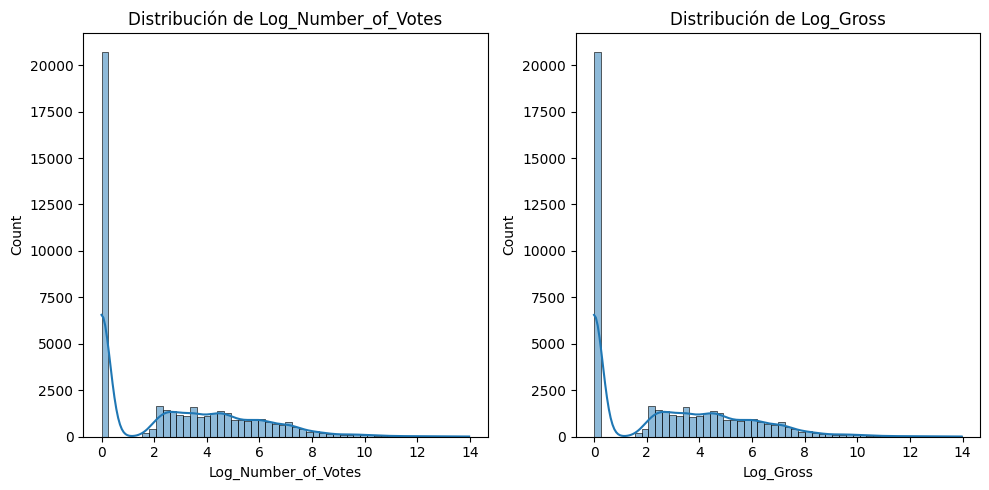

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir las columnas a numéricas, forzando errores a NaN
anime2['Number of Votes'] = pd.to_numeric(anime2['Number of Votes'], errors='coerce')
anime2['Gross'] = pd.to_numeric(anime2['Gross'], errors='coerce')

# Rellenar NaN con 0 si es necesario (esto puede ser cambiado según el contexto de los datos)
anime2['Number of Votes'].fillna(0, inplace=True)
anime2['Gross'].fillna(0, inplace=True)

# Verificar si hay valores negativos (no deberían existir en estas columnas)
print((anime2['Number of Votes'] < 0).sum())
print((anime2['Gross'] < 0).sum())

# Aplicar transformación logarítmica a 'Number of Votes' y 'Gross'
anime2['Log_Number_of_Votes'] = np.log1p(anime2['Number of Votes'])
anime2['Log_Gross'] = np.log1p(anime2['Gross'])

# Verificar la nueva distribución después de la transformación
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(anime2['Log_Number_of_Votes'], kde=True)
plt.title('Distribución de Log_Number_of_Votes')

plt.subplot(1, 2, 2)
sns.histplot(anime2['Log_Gross'], kde=True)
plt.title('Distribución de Log_Gross')

plt.tight_layout()
plt.show()


In [16]:
# Codificar variables categóricas
categorical_cols = ['Genre', 'Certificate']
# Verificar si las columnas categóricas existen antes de aplicar get_dummies
categorical_cols = [col for col in categorical_cols if col in anime2.columns]
anime2 = pd.get_dummies(anime2, columns=categorical_cols, drop_first=True)


In [19]:
# Convertir 'User Rating' y 'Metascore' a numérico, forzando errores a NaN
anime2['User Rating'] = pd.to_numeric(anime2['User Rating'], errors='coerce')
anime2['Metascore'] = pd.to_numeric(anime2['Metascore'], errors='coerce')

# Verificar valores nulos nuevamente después de la conversión
print(anime2.isnull().sum())

# Rellenar valores nulos para columnas numéricas con la media
anime2['User Rating'].fillna(anime2['User Rating'].mean(), inplace=True)
anime2['Metascore'].fillna(anime2['Metascore'].mean(), inplace=True)

# Rellenar valores nulos para columnas categóricas con la moda
anime2.fillna(anime2.mode().iloc[0], inplace=True)


#Verificar valores nulos en todas las columnas
print(anime2.isnull().sum())

# Rellenar valores nulos para columnas numéricas con la media
anime2['User Rating'].fillna(anime2['User Rating'].mean(), inplace=True)
anime2['Metascore'].fillna(anime2['Metascore'].mean(), inplace=True)

# Rellenar valores nulos para columnas categóricas con la moda
anime2.fillna(anime2.mode().iloc[0], inplace=True)



Title                       0
User Rating             20709
Number of Votes             0
Runtime                 13168
Year                      126
                        ...  
Certificate_TV-Y7-FV        0
Certificate_U               0
Certificate_Uc              0
Certificate_Unrated         0
Certificate_X               0
Length: 245, dtype: int64
Title                   0
User Rating             0
Number of Votes         0
Runtime                 0
Year                    0
                       ..
Certificate_TV-Y7-FV    0
Certificate_U           0
Certificate_Uc          0
Certificate_Unrated     0
Certificate_X           0
Length: 245, dtype: int64


In [21]:
# Codificar variables categóricas
categorical_cols = ['Genre', 'Certificate']

5. Análisis de Correlaciones: genera un análisis de correlaciones de las variables. No es
necesario que apliques todos los métodos vistos en clases, basta que argumentes
bien cuál utilizarás y por qué, y si necesitas algo más. La idea es generar gráficos
para entender la relación entre las diferentes variables, poniendo foco en la variable
objetivo.

In [26]:
numeric_cols2 = anime2.select_dtypes(include=[np.number])
# Calcular la matriz de correlación
correlation_matrix = numeric_cols2.corr(method='pearson')

# Mostrar las primeras filas de la matriz de correlación
print(correlation_matrix.head())


                     User Rating  Number of Votes  Metascore     Gross  \
User Rating             1.000000         0.060379   0.064175  0.060379   
Number of Votes         0.060379         1.000000   0.410506  1.000000   
Metascore               0.064175         0.410506   1.000000  0.410506   
Gross                   0.060379         1.000000   0.410506  1.000000   
Log_Number_of_Votes     0.146295         0.223646   0.023456  0.223646   

                     Log_Number_of_Votes  Log_Gross  
User Rating                     0.146295   0.146295  
Number of Votes                 0.223646   0.223646  
Metascore                       0.023456   0.023456  
Gross                           0.223646   0.223646  
Log_Number_of_Votes             1.000000   1.000000  


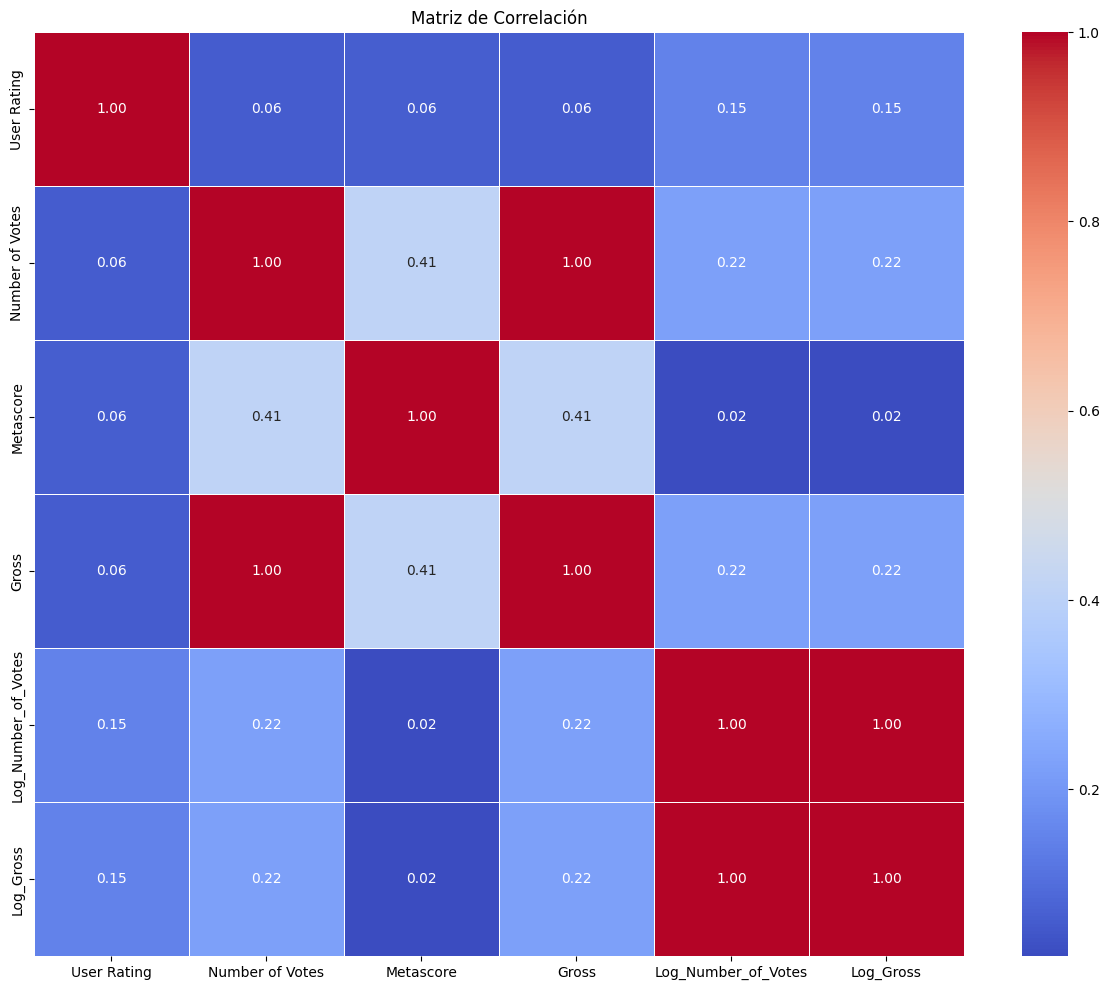

In [27]:
# Visualizar la matriz de correlación mediante un heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


Número de Votos (Number of Votes) parece estar moderadamente correlacionado con Metascore y Gross, lo que sugiere que las animaciones con más votos tienden a tener una puntuación Metascore y una recaudación bruta más altas.

La correlación entre User Rating y otras variables parece ser bastante baja, lo que indica que el rating de usuario no está fuertemente relacionado con el número de votos, la puntuación Metascore, o la recaudación bruta.

Log_Number_of_Votes y Log_Gross están altamente correlacionados con Number of Votes y Gross respectivamente, lo cual es esperado dado que son transformaciones logarítmicas de esas variables.

6. Genera una función que resuma todo el procesamiento necesario para el dataset,
que lea el dataset original y entregue un dataset ya tratado, con las columnas
transformadas y creadas.

In [ ]:
def procesar_dataset(ruta_archivo):
    # Paso 1: Cargamos el dataset
    df = pd.read_csv(ruta_archivo)

    # Paso 2: Realizar preprocesamiento de los datos
    # Por ejemplo, eliminar columnas no deseadas
    columnas_no_deseadas = ['Columna1', 'Columna2']
    df = df.drop(columns=columnas_no_deseadas)

    # Tratar con los valores nulos
    df['Variable'].fillna(df['Variable'].mean(), inplace=True)

    # Transformar variables
    df['Log_Variable'] = np.log1p(df['Variable'])

    # Crear nuevas características
    df['Nueva_Caracteristica'] = df['Variable1'] * df['Variable2']

    # Paso 3: Devolver el dataset procesado
    return df

7. A partir de las columnas que obtuviste realiza una selección de variables según los
siguientes métodos:
a. Filtros basados en correlaciones
b. Forward Selection.
Compara ambos métodos y responde si coincide lo resultante con lo obtenido en el
análisis exploratorio.

In [37]:

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

target_variable = 'User Rating'

# Filtros basados en correlaciones
target_variable = 'User Rating'
correlation_matrix = numeric_cols2.corr()
relevant_features_corr = correlation_matrix[target_variable][abs(correlation_matrix[target_variable]) > 0.5].index.tolist()

# Forward Selection
selected_features_forward = []
best_score = -np.inf
selected_features = []
base_model = LinearRegression()

for feature in numeric_cols2.columns:
 if feature != target_variable: 
    selected_features_forward.append(feature)
    scores = cross_val_score(base_model, anime2[selected_features_forward], anime2[target_variable], cv=5)
    score = np.mean(scores)
    if score > best_score:
        best_score = score
        selected_features = selected_features_forward.copy()
    else:
        selected_features_forward.remove(feature)

print("Características seleccionadas por el método de correlación:")
print(relevant_features_corr)
print("\nCaracterísticas seleccionadas por el método de Forward Selection:")
print(selected_features)



Características seleccionadas por el método de correlación:
['User Rating']

Características seleccionadas por el método de Forward Selection:
['Number of Votes', 'Log_Number_of_Votes', 'Log_Gross']


Podemos concluir que:
El primer enfoque se basó en correlaciones, donde identificamos características que tienen una correlación significativa (mayor a 0.5) con la variable objetivo. Sin embargo, este método solo seleccionó la propia variable objetivo, lo que indica una fuerte correlación consigo misma, lo cual es evidente pero no nos proporciona información adicional sobre otras características.Fue inutil.

Por otro lado, implementamos el método de Forward Selection, que es una técnica de selección de características que evalúa el rendimiento de un modelo de regresión lineal al agregar características de manera iterativa. Este método seleccionó tres características adicionales además de la variable objetivo: "Number of Votes", "Log_Number_of_Votes" y "Log_Gross". Estas características tienen un potencial significativo para predecir el "User Rating" .
Esto sugiere que el método de Forward Selection es más efectivo para seleccionar características relevantes en este caso específicosegún los resultados obtenidos